# Project 1
## You may have to do some clever google-searches, slack posting, and collaboration to find answers to these questions!!! (Post in Slack, talk with eachother, ask me for help!)

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which passengers will survive on the Titantic, using all avaliable data (age, passenger class, fare, ect...).



## **Create a Data Dictionary**

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Survived | Surival Status (0 = No 1= Yes) | Integer
Sex | 0 = Male 1 = Female | Categorical
pClass| Passenger class | Categorical
Age | Age of passenger | Numerical
Fare | Passenger Fare | Numerical
Family | 0 = Alone 1 = With Family | Categorical



#### 1. What is the outcome? (Rather morbid, I realize this)

Answer:
The outcome here is the mean survival rate of passengers aboard the Titanic. Overall, roughly 38% of the passengers survived. First class survival rate was close to 62%, 42% for second class, and 25% for third class.

In general, women had a higher survival rate across all 3 classes. 

 | Male | Female | Overall
---| ---| 
1st Class| 34% | 97% | 62%
2nd Class| 15% | 89% | 42%
3rd Class| 15% | 49% | 25%

#### 2. What are the predictors/covariates? 

Answer: 

Predictors/Covariates: Sex, Class (Passenger Class), whether they were alone or with a family, and age.

#### 3. What timeframe is this data relevent for?

Answer: 

The night the Titanic sank 4/14/1912 (roughly 2 hr and 40 min)


#### 4. What is the hypothesis?

**Null 1:** No relationship between age and survival

**Alternative 1:** There is a relationship between age and survival


**Null 2:** No relationship between gender and survival

**Alternative Hypothesis 2:** There is a relationship between gender and survival 


**Null 3:** No relationship betweeen passenger class/cost of fare and survival

**Alternative Hypothesis 3:** Tthere is a relationship between passenger class/cost of fare and survival


**Null 4:** No relationship between those traveling solo vs w/ families and survival 

**Alternative Hypothesis 4:** There is a relationship between those traveling solo vs w/families and survival 





    Using the above information, write a well-formed problem statement. 


### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 

To uncover what variables had the greatest influence over the survival rate of the passengers aboard the Titanic.

#### 2a. What are the assumptions of the distribution of data? 

Answer: 

Women (and children) will have a higher survival rate in comparison to men. Those in first class will have a higher survival rate in comparison to those in second and third class. 

In terms of age distribution, younger women will have a higher survival rate. While middle aged men will have a higher survival rate than younger men. Assumption here is that the wealthier passengers will be older than the young men. In this case, wealth of the passenger may be the confounding variable. 

#### 2b. How will determine the distribution of your data? 

Answer: 

For the age variable, begin by finding the mean age of survial from the passengers aboard the ship. This will help identify the shape of the distribution we are working with. From the data set, we can see that majority of the survivors fell within the 15-35 age range, with a relative peak at 30 years of age (mean age = 29.69).


#### 3a. How might outliers impact your analysis? 

Answer:

The distribution curve is right tailed, suggesting there were more outliers (passengers) above the 29.7 mean age and, in turn, skewing the mean age higher. We can validate this by taking the median (resistant to outliers) of the age data set, which is 28 years of age. 





#### 3b. How will you test for outliers? 

Answer:

Using the IQR test - looking at outliers in terms of normal distribution. Those data sets that exceed 3 (potentially 2) standard deviations from the mean will be identified as outliers.



**Grubbs Test** can be used as a secondary means using the following formulas:

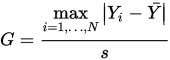

Minimum Outlier (Two-Sided Test)
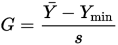

Maximum Outlier (Two-Sided Test)
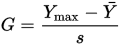

#### 4a. What is colinearity? 

Answer: 

When multiple factors are not only moderately/highly correlated to the response variable but to other predictorates as well. 


#### 4b. How will you test for colinearity? 

Answer: 

One of the test for collinearity would be the F-Test, where we can test more than 2 groups at a time in order to determine if there is an overall difference between the groups. 
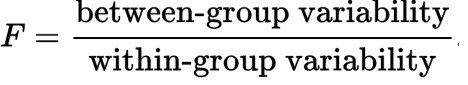



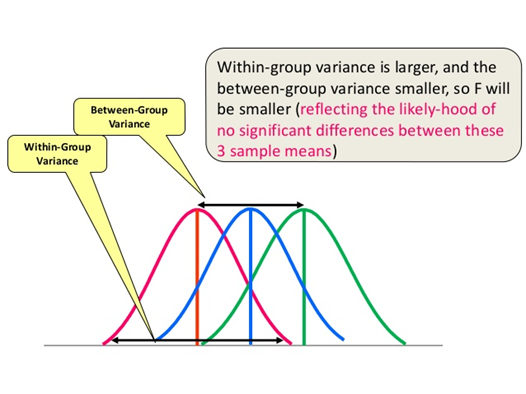

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Begin by creating your problem statement. In this case, we are looking at how many people survived the sinking of the Titanic. Based on the given data set, determine what potential variables could influence once survival, be it age, sex, passenger class, etc. 

Once the variables have been determined, begin to explore the data set and look for relationships amongst the outlined variables and chances of survival. Certain variables will be influenced and could be potentially confounded by other variables i.e. age and wealth/passenger class. 

I chose to focus primarily on age as the main variable to determine survival. In the below graphs, we can see that majority of the passengers (mean) were under the age of 30. Given how responsive the mean is to outliers, it is beneficial to validate the accuracy of mean by tying in the median. Here we saw that the median was slightly lower than the mean, suggesting there were outliers pulling the average age towards the right (older age). 

We can take the IQR test to determine the outliers and where the line should be drawn. In this instance, our only outlier was to anyone ove the age of 65.

The second variable I chose to explore was sex. The maritime rule 'women and children first' certainly carried weigh in the survival chances of women compared to men. The graphs below outlie that across all three classes, women had a much higher rate of survival when compared to men. The comparison is extremely drastic when looking at first class survival - where a large majority of women survived and roughly only 1/3 of men survived. The disparity was significnatly more drastic when looking at the lower class. 

In [118]:
##import pandas as pd & numpy as np
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go

In [119]:
## import titanic data set

titanic_df = pd.read_csv("C:/Users/ilybangi/Downloads/train.csv")
test_df    = pd.read_csv("C:/Users/ilybangi/Downloads/test.csv")

In [120]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [121]:
# mean of the age range 

titanic_df['Age'].mean()

29.69911764705882

In [122]:
# median of the age range

titanic_df['Age'].median()

28.0

In [123]:
## find the quartiles of the age data range

titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [124]:
## IQR

38-20.125

17.875

In [125]:
## Finding Outliers

20.125-(1.5*(17.875))

-6.6875

*Not valid because a passengers age cannot be less than 0*

In [126]:
38+(1.5*(17.875))

64.8125

*Any passenger above the age of 65 (rounded up from 64.8) will be considered an outlier*

In [127]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [128]:
##Plotting the amount of passengers per class

## dimensions of plot area
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,1),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')    
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 


In [117]:
##plotting survival of Men and Women between high and low classes

fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

## Bonus Questions:
1. Outline your analysis method for predicting your outcome - 0 1 (survived and not survived) predict w/ calssification, probability models   --> blog post from yhat  blog about logistic regression. check old lesson notes
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model